Problem1_Modern_Portfolio_Theory

Import

In [16]:
import numpy as np
import pandas as pd
from math import log
from matplotlib import pyplot as plt
from scipy.optimize import minimize

Preprocessing

In [17]:
data = pd.read_csv('dataset.csv')
print(data.head())

         Date  SAMSUNG ELECTRONICS   NAVER  LG CHEM  HYUNDAI MOTORS  \
0  2011-01-01                15680   49029   200000          113000   
1  2011-02-01                19620   51971   420000          179000   
2  2011-03-01                22140   59080   374000          221000   
3  2011-04-01                28960  135000   304500          205000   
4  2011-05-01                25600  143200   260000          234500   

   SAMSUNG SDI   KAKAO  KB FINANCIAL  LG HHC  SK TELECOM  SK INNOVATION  \
0       136000   70600         50600  284000      183000         105500   
1       156000   80600         57500  407000      164500         204500   
2       139500  131900         42600  478000      142500         170000   
3       142500  102100         38900  607000      167500         171500   
4       143500   80000         37200  478000      216500         127000   

     KOSPI  KOR10Y  
0  1602.43    5.34  
1  2069.73    4.71  
2  1955.79    3.76  
3  1961.94    3.10  
4  1941.15    3.6

In [18]:
data

,Date,SAMSUNG ELECTRONICS,NAVER,LG CHEM,HYUNDAI MOTORS,SAMSUNG SDI,KAKAO,KB FINANCIAL,LG HHC,SK TELECOM,SK INNOVATION,KOSPI,KOR10Y
0,2011-01-01,15680,49029,200000,113000,136000,70600,50600,284000,183000,105500,1602.43,5.340
1,2011-02-01,19620,51971,420000,179000,156000,80600,57500,407000,164500,204500,2069.73,4.710
2,2011-03-01,22140,59080,374000,221000,139500,131900,42600,478000,142500,170000,1955.79,3.760
3,2011-04-01,28960,135000,304500,205000,142500,102100,38900,607000,167500,171500,1961.94,3.100
4,2011-05-01,25600,143200,260000,234500,143500,80000,37200,478000,216500,127000,1941.15,3.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2020-08-01,25200,155000,328500,149000,114000,115800,33150,1050000,215500,130000,1961.31,2.085
116,2020-09-01,36040,174000,261000,146000,109000,77000,42800,857000,224000,146500,2026.46,2.092
117,2020-10-01,50960,122000,405000,156000,204500,137000,63400,1189000,267000,204500,2467.49,2.467
118,2020-11-01,38700,186500,347000,118500,219000,103000,46500,1101000,269500,179500,2041.04,1.956


In [19]:
colname = data.columns
data = data.set_index(data['Date'])
del data['Date']
data[colname[1:-2]] = data[colname[1:-2]]
temp_data = data.iloc[:,0:-2].astype('float')

# calculate logarithmic return of each asset
for index in range(len(temp_data)):
    if index == 0:
        continue
    temp_data.iloc[index,:] = np.log(data.iloc[index,:-2]/data.iloc[index-1,:-2])

temp_data.drop(['2011-01-01'], inplace=True)
data.drop(['2011-01-01'], inplace=True)
data[colname[1:-2]] = temp_data
numeric_df = data.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
which_column = numeric_df.columns

In [20]:
numeric_df

,SAMSUNG ELECTRONICS,NAVER,LG CHEM,HYUNDAI MOTORS,SAMSUNG SDI,KAKAO,KB FINANCIAL,LG HHC,SK TELECOM,SK INNOVATION
Date,,,,,,,,,,
2011-02-01,0.224163,0.058274,0.741937,0.459998,0.137201,0.132469,0.127833,0.359839,-0.106576,0.661857
2011-03-01,0.120836,0.128207,-0.115999,0.210777,-0.111791,0.492545,-0.299931,0.160798,-0.143569,-0.184770
2011-04-01,0.268530,0.826382,-0.205585,-0.075153,0.021277,-0.256091,-0.090860,0.238918,0.161641,0.008785
2011-05-01,-0.123323,0.058967,-0.157989,0.134446,0.006993,-0.243926,-0.044685,-0.238918,0.256607,-0.300396
2011-06-01,0.064294,-0.131140,-0.269893,-0.324603,-0.106523,0.646449,-0.010811,0.364178,0.288836,-0.304089
...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-0.051809,0.163658,0.596040,-0.125952,-0.017392,-0.065186,-0.086634,0.521999,-0.218026,0.423707
2020-09-01,0.357785,0.115630,-0.230016,-0.020340,-0.044851,-0.408059,0.255495,-0.203108,0.038685,0.119491
2020-10-01,0.346412,-0.355034,0.439367,0.066249,0.629220,0.576176,0.392926,0.327430,0.175603,0.333543


In [21]:
which_column = numeric_df.columns
which_column

Index(['SAMSUNG ELECTRONICS', 'NAVER', 'LG CHEM', 'HYUNDAI MOTORS',
       'SAMSUNG SDI', 'KAKAO', 'KB FINANCIAL', 'LG HHC', 'SK TELECOM',
       'SK INNOVATION'],
      dtype='object')

In [22]:
returns = np.array(numeric_df) # logarithmic return data
S = np.array(numeric_df.cov()) # covariance matrix
r = np.mean(returns, axis=0) # mean of logarithmic return
Si = np.linalg.inv(S)
e = np.ones(len(r))
a = np.matmul(np.matmul(r,Si),r)
b = np.matmul(np.matmul(r,Si), e)
c = np.matmul(np.matmul(e,Si), e)

In [23]:
returns

array([[ 0.22416344,  0.05827391,  0.74193734, ...,  0.35983895,
        -0.10657558,  0.66185702],
       [ 0.12083647,  0.12820659, -0.11599891, ...,  0.16079755,
        -0.14356857, -0.18476954],
       [ 0.26852964,  0.82638232, -0.20558471, ...,  0.23891806,
         0.16164135,  0.00878483],
       ...,
       [ 0.34641158, -0.35503425,  0.43936666, ...,  0.32742998,
         0.17560261,  0.33354255],
       [-0.27520141,  0.42441019, -0.15456229, ..., -0.07689376,
         0.00931973, -0.13039277],
       [ 0.36593427,  0.45003343, -0.08884696, ...,  0.1356862 ,
        -0.12429772, -0.17953991]])

Problem1_Q1

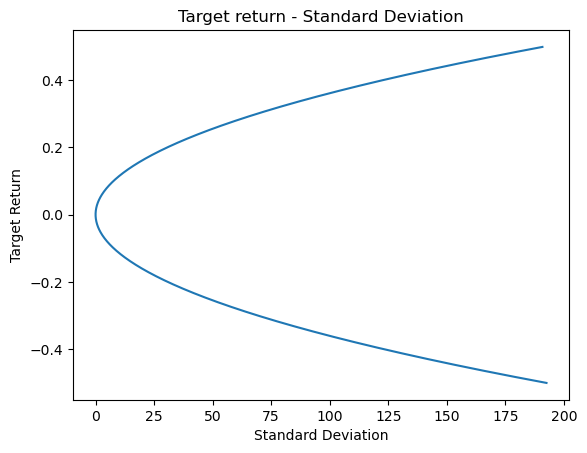

In [24]:
range_np = np.arange(-0.5,0.5,0.001)
list_w = [] # target return results will be saved here

for i in range_np:
    mu = i
    bottom = a*c - b*b
    l1 = (c*mu - b) / bottom
    l2 = (-b*mu + a) / bottom
    w = l1 * (np.matmul(Si, r)) + l2 * (np.matmul(Si, e))
    mean_return = np.sum(r*w) 
    std = np.matmul(np.matmul(w.T,S), w)
    list_w.append((i, mean_return, std, w)) # target rate of return, mean return, std, portfolio weight
m_v_df = pd.DataFrame(list_w, columns = ['target return','mean return', 'std', 'weight'])
x_plt = list(m_v_df['std'])
y_plt = list(m_v_df['target return'])
plt.ylabel('Target Return')
plt.xlabel('Standard Deviation')
plt.plot(x_plt, y_plt)
plt.title('Target return - Standard Deviation')
plt.show()

In [25]:
def objective(x):
    return np.matmul(np.matmul(x,S), x) # portfolio variance(risk)
# Initial guess should be a one-dimensional array
w = [0] * 10

# Constraints for optimization
const = ({'type': 'ineq', 'fun': lambda w: np.dot(w, r)},  
         # Inequality constraint for expected return (should be 0 or more)
         {'type': 'eq', 'fun': lambda w: np.dot(w, e) - 1})  
# Equality constraint to ensure weights sum to 1

# Optimize the weights (Using Sequential Least Squares Programming)
solution = minimize(fun=objective, x0=w, method='SLSQP', constraints=const)

# Extract optimized weights and print results
w = solution.x.round(6)
print("Mean Return : ", np.sum(r * w)) 
print("Standard Deviation : ", np.sqrt(np.dot(np.dot(w, S), w)))
print("Weight")
print(pd.DataFrame([w], columns=which_column, index=['Weight']))

Mean Return :  0.0006273498514929128
Standard Deviation :  0.10826679222179712
Weight
        SAMSUNG ELECTRONICS     NAVER   LG CHEM  HYUNDAI MOTORS  SAMSUNG SDI  \
Weight            -0.399499  0.054954 -0.304586         0.48351     0.064432   

           KAKAO  KB FINANCIAL    LG HHC  SK TELECOM  SK INNOVATION  
Weight -0.045728      0.484371  0.360468    0.238229       0.063848  


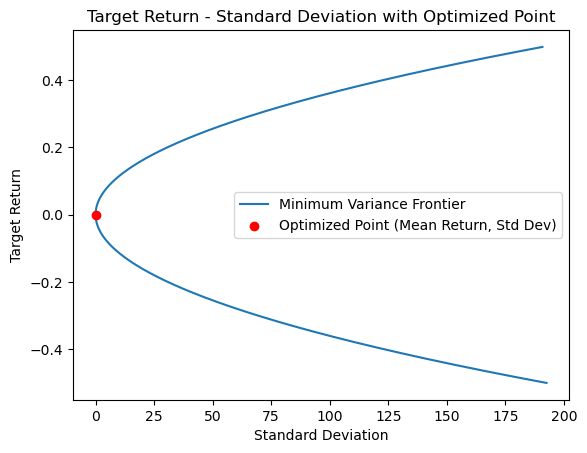

In [26]:
# First, retrieve the optimized standard deviation and mean return values
mean_return_optimized = np.sum(r * w)
std_optimized = np.sqrt(np.dot(np.dot(w, S), w))

# Now, plot the frontier and the optimized point
plt.ylabel('Target Return')
plt.xlabel('Standard Deviation')

# Plot the frontier
plt.plot(x_plt, y_plt, label='Minimum Variance Frontier')

# Plot the optimized point
plt.scatter(std_optimized, mean_return_optimized, color='red',
            label='Optimized Point (Mean Return, Std Dev)', zorder=5)

# Add title and legend
plt.title('Target Return - Standard Deviation with Optimized Point')
plt.legend()

# Show the plot
plt.show()

Problem1_Q2

In [27]:
bottom = (a*c) - (b*b)
mu = 0.01
l1 = (c*mu - b) / bottom
l2 = ((-b)*mu + a) / bottom
w = l1 * (np.matmul(Si, r)) + l2 * (np.matmul(Si, e))
mean_return = np.sum(r*w)
std = np.matmul(np.matmul(w, S), w)
print("Mean Return : {:4f}, Standard Deviation : {:4f}".format(mean_return, np.sqrt(std)))
print(pd.DataFrame([w],columns=which_column, index=['Weight']))

Mean Return : 0.010000, Standard Deviation : 0.281393
        SAMSUNG ELECTRONICS     NAVER   LG CHEM  HYUNDAI MOTORS  SAMSUNG SDI  \
Weight             0.251686  0.411275  0.927199        0.096157    -0.165427   

           KAKAO  KB FINANCIAL    LG HHC  SK TELECOM  SK INNOVATION  
Weight -0.008503      0.632403  0.175049   -0.455136      -0.864704  


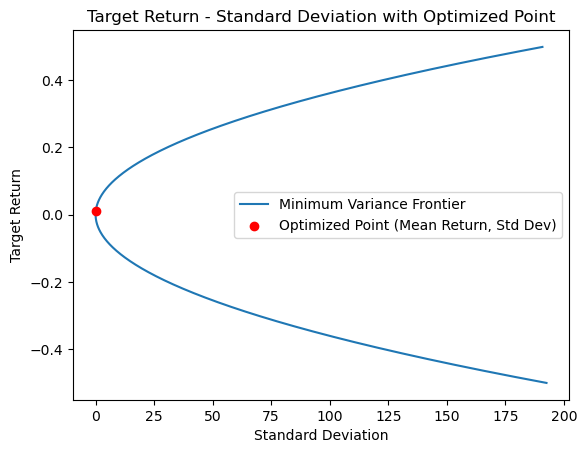

In [28]:
# First, retrieve the optimized standard deviation and mean return values
mean_return_optimized_2 = np.sum(r*w)
std_optimized_2 = np.sqrt(np.matmul(np.matmul(w, S), w))

# Now, plot the frontier and the optimized point
plt.ylabel('Target Return')
plt.xlabel('Standard Deviation')

# Plot the frontier
plt.plot(x_plt, y_plt, label='Minimum Variance Frontier')

# Plot the optimized point
plt.scatter(std_optimized_2, mean_return_optimized_2, color='red',
            label='Optimized Point (Mean Return, Std Dev)', zorder=5)

# Add title and legend
plt.title('Target Return - Standard Deviation with Optimized Point')
plt.legend()

# Show the plot
plt.show()

Problem1_Q3

In [30]:
pip install cvxopt

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.8 MB 825.8 kB/s eta 0:00:16
    --------------------------------------- 0.2/12.8 MB 1.6 MB/s eta 0:00:08
   - -------------------------------------- 0.4/12.8 MB 2.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/12.8 MB 3.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.9/12.8 MB 3.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/12.8 MB 3.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.4/12.8 MB 3.7 MB/s eta 0:00:04
   ---- ----------------------------------- 1.6/12.8 MB 3.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/12.8 MB 4.0 MB/s eta 0:00:03
   ------ --------------------------------- 2.0/12.8 MB 4.0 MB/s eta 0:00:03
   ------ --------------------------------- 2.2/12.8 MB 4.0 MB/s eta 0:00:03
   ------- 

     pcost       dcost       gap    pres   dres
 0:  1.6510e-02 -1.0132e+00  1e+00  2e-16  4e+00
 1:  1.5931e-02 -1.6085e-02  3e-02  6e-17  1e-01
 2:  1.0202e-02  5.2724e-03  5e-03  9e-17  2e-17
 3:  8.6532e-03  7.8167e-03  8e-04  2e-16  1e-17
 4:  8.3329e-03  8.2505e-03  8e-05  1e-16  1e-17
 5:  8.2926e-03  8.2870e-03  6e-06  1e-16  8e-18
 6:  8.2903e-03  8.2899e-03  4e-07  2e-16  1e-17
 7:  8.2901e-03  8.2900e-03  5e-08  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6510e-02 -1.0132e+00  1e+00  7e-19  4e+00
 1:  1.5931e-02 -1.6082e-02  3e-02  7e-17  1e-01
 2:  1.0202e-02  5.2736e-03  5e-03  7e-17  1e-17
 3:  8.6532e-03  7.8168e-03  8e-04  1e-16  1e-17
 4:  8.3328e-03  8.2506e-03  8e-05  2e-16  9e-18
 5:  8.2926e-03  8.2870e-03  6e-06  1e-16  9e-18
 6:  8.2903e-03  8.2899e-03  4e-07  1e-16  8e-18
 7:  8.2901e-03  8.2900e-03  5e-08  2e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6510e-02 -1.0131e

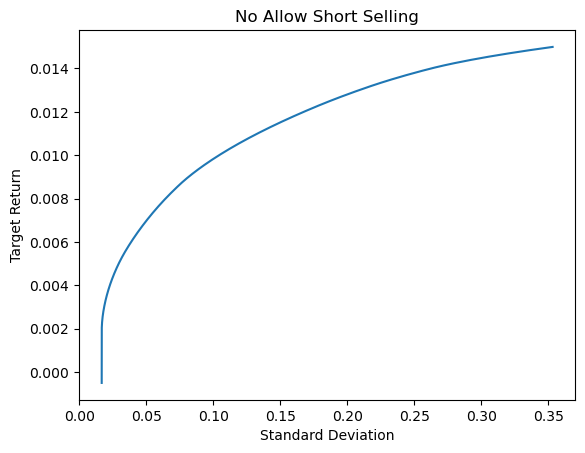

In [31]:
pip install cvxopt

from cvxopt import matrix
from cvxopt.solvers import qp
import numpy as np
import matplotlib.pyplot as plt

# Ensure the covariance matrix is positive definite
cov = matrix(S)
mean_return = matrix(r)

# Define no-short-selling constraint for portfolio weights
n = len(r)  # Number of assets

# Define a realistic target return range based on the minimum and maximum expected returns
min_ret = np.min(r)
max_ret = np.max(r)
range_np = np.arange(min_ret, max_ret, 0.00005)  # Ensure that target returns are in the feasible range

list_w = []
for ret in range_np:
    try:
        # Inequality constraints: -mean_return.T * w <= -ret and w >= 0 (no short-selling)
        G = matrix(np.vstack((-mean_return.T, -np.identity(n))))
        
        # The corresponding vector h for G * w <= h
        h = matrix(np.vstack((-np.ones((1, 1)) * ret, np.zeros((n, 1)))))
        
        # Equality constraint A * w = b (sum of weights should be 1)
        A = matrix(np.ones((1, n)))
        b = matrix(1.0)
        
        # Vector q (linear term in the objective function) is zero since we only minimize variance
        q = matrix(np.zeros((n, 1)))

        # Solve quadratic program
        sol = qp(cov, q, G, h, A, b)
        
        # Extract weights
        w = np.asarray(sol['x']).squeeze()
        
        # Calculate mean return and standard deviation
        mean_rate = np.sum(w * r)
        std_dev = np.round(np.matmul(np.matmul(w.T, S), w), 6)
        
        # Append results to the list
        list_w.append((ret, mean_rate, std_dev, list(sol['x'])))
    
    except ValueError as e:
        print(f"Error for target return {ret}: {e}")
        continue

# Create a DataFrame to store the results
no_short_df = pd.DataFrame(list_w, columns=['Target Return', 'mean rate', 'std', 'weight'])

# Plot the efficient frontier
x_plt = list(no_short_df['std'])
y_plt = list(no_short_df['Target Return'])

plt.ylabel('Target Return')
plt.xlabel('Standard Deviation')
plt.title('No Allow Short Selling')
plt.plot(x_plt, y_plt)
plt.show()

In [32]:
no_short_df.head()

,Target Return,mean rate,std,weight
0,-0.000505,0.001819,0.01658,"[3.447894849093434e-08, 0.0005064629205783499,..."
1,-0.000455,0.001819,0.01658,"[3.4452363325905445e-08, 0.000506144827064997,..."
2,-0.000405,0.001819,0.01658,"[3.442473936004305e-08, 0.0005058137514474626,..."
3,-0.000355,0.001819,0.01658,"[3.439601431189133e-08, 0.0005054688908228762,..."
4,-0.000305,0.001819,0.01658,"[3.436612084580286e-08, 0.0005051093757233683,..."


In [33]:
sample = no_short_df[no_short_df['std'] == 0.01658]
sort_sample = sample.sort_values(by = ['Target Return'], ascending = False) # Sort the selected rows by target return in descending order
portfolio = sort_sample.iloc[0]
print("highest target return point will be minimum variance point") # highest target return point is minimum variance point
print(portfolio)
print('highest weight asset : ', which_column[np.argmax(portfolio[3])], 'weight : ', max(portfolio[3])) # highest weight asset
print('\nPortfolio return : {:4f}, Standard Deviation : {:4f}'.format(portfolio[1], np.sqrt(portfolio[2])))
print('Weight')
print(pd.DataFrame([portfolio[3]], columns=which_column, index=['Weight']))

highest target return point will be minimum variance point
Target Return                                             0.001795
mean rate                                                 0.001819
std                                                        0.01658
weight           [3.479295440388784e-08, 0.0004875188686894851,...
Name: 46, dtype: object
highest weight asset :  HYUNDAI MOTORS weight :  0.339994922997487

Portfolio return : 0.001819, Standard Deviation : 0.128763
Weight
        SAMSUNG ELECTRONICS     NAVER       LG CHEM  HYUNDAI MOTORS  \
Weight         3.479295e-08  0.000488  1.758252e-07        0.339995   

         SAMSUNG SDI         KAKAO  KB FINANCIAL   LG HHC  SK TELECOM  \
Weight  5.722544e-08  1.560255e-07      0.249654  0.08065    0.306339   

        SK INNOVATION  
Weight       0.022874  


C:\Users\김수빈\AppData\Local\Temp\ipykernel_12956\1220897660.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('highest weight asset : ', which_column[np.argmax(portfolio[3])], 'weight : ', max(portfolio[3])) # highest weight asset
C:\Users\김수빈\AppData\Local\Temp\ipykernel_12956\1220897660.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('\nPortfolio return : {:4f}, Standard Deviation : {:4f}'.format(portfolio[1], np.sqrt(portfolio[2])))
C:\Users\김수빈\AppData\Local\Temp\ipykernel_12956\1220897660.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integ

In [34]:
# portfolio[3] weight
weights_sum = np.sum(portfolio[3])

# check if weight sum equals 1
print(f"Sum of the portfolio weights: {weights_sum}")

if np.isclose(weights_sum, 1.0):
    print("The sum of the portfolio weights is 1.")
else:
    print("The sum of the portfolio weights is NOT 1.")

Sum of the portfolio weights: 1.0
The sum of the portfolio weights is 1.


C:\Users\김수빈\AppData\Local\Temp\ipykernel_12956\1549174912.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  weights_sum = np.sum(portfolio[3])


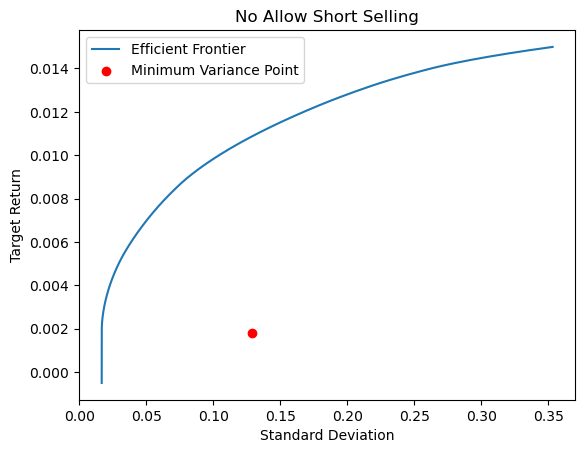

In [35]:
# Extract the standard deviation and mean return for the minimum variance point
std_min_variance = np.sqrt(portfolio['std'])
mean_return_min_variance = portfolio['mean rate']

# Plot the efficient frontier
plt.ylabel('Target Return')
plt.xlabel('Standard Deviation')
plt.title('No Allow Short Selling')

# Plot the efficient frontier
plt.plot(x_plt, y_plt, label='Efficient Frontier')

# Plot the minimum variance point as a red point
plt.scatter(std_min_variance, mean_return_min_variance, color='red', label='Minimum Variance Point', zorder=5)

# Add title and legend
plt.legend()
plt.show()

Problem1_Q4

In [36]:
target_return = 0.01
G = matrix(np.concatenate((-np.transpose(mean_return), -np.identity(n)), 0))
h = matrix(np.concatenate((-np.ones((1, 1))*target_return, np.zeros((n, 1))), 0))
A = matrix(np.ones((1, n)))
b = matrix(1.0)
q = matrix(np.zeros((n, 1)))
sol = qp(cov, q, G, h, A, b)
w = np.asarray(sol['x']).squeeze()
print("Target Return : ", target_return)
print("Portfolio Return : ", np.sum(w*r))
print("Standard Deviation : ", np.sqrt(np.round(np.matmul(np.matmul(w.T, S), w), 6)))
print("Weight")
print(pd.DataFrame(list(np.asarray(sol['x']).T), columns=which_column, index=['Weight']))

     pcost       dcost       gap    pres   dres
 0:  1.6517e-02 -1.0014e+00  1e+01  3e+00  4e+00
 1:  1.9750e-02 -8.2736e-01  1e+00  5e-02  5e-02
 2:  1.9420e-02 -2.7168e-01  3e-01  1e-02  2e-02
 3:  4.2000e-02 -1.0368e-01  3e-01  1e-02  1e-02
 4:  6.7899e-02 -8.7798e-03  8e-02  4e-16  1e-16
 5:  5.8735e-02  4.7089e-02  1e-02  2e-16  2e-16
 6:  5.2803e-02  5.1357e-02  1e-03  1e-16  4e-16
 7:  5.2132e-02  5.2099e-02  3e-05  1e-16  1e-15
 8:  5.2120e-02  5.2119e-02  3e-07  4e-17  9e-15
 9:  5.2120e-02  5.2120e-02  3e-09  7e-17  6e-15
Optimal solution found.
Target Return :  0.01
Portfolio Return :  0.010000000014989888
Standard Deviation :  0.3228606510555289
Weight
        SAMSUNG ELECTRONICS     NAVER   LG CHEM  HYUNDAI MOTORS   SAMSUNG SDI  \
Weight             0.248167  0.296477  0.202981    7.473474e-09  2.853646e-08   

           KAKAO  KB FINANCIAL    LG HHC    SK TELECOM  SK INNOVATION  
Weight  0.174457  1.085882e-08  0.077918  7.182391e-09   6.124007e-09  


In [37]:
weights_sum = np.sum(w)

# check if weight sum equals 1
print(f"Sum of the portfolio weights: {weights_sum}")

if np.isclose(weights_sum, 1.0):
    print("The sum of the portfolio weights is 1.")
else:
    print("The sum of the portfolio weights is NOT 1.")

Sum of the portfolio weights: 1.0
The sum of the portfolio weights is 1.


In [38]:
# Check if any weights are negative (which should not happen)
if np.any(w < 0):
    print("Warning: Some weights are negative, which violates the no short-selling constraint.")
else:
    print("All weights are non-negative, as expected.")

All weights are non-negative, as expected.


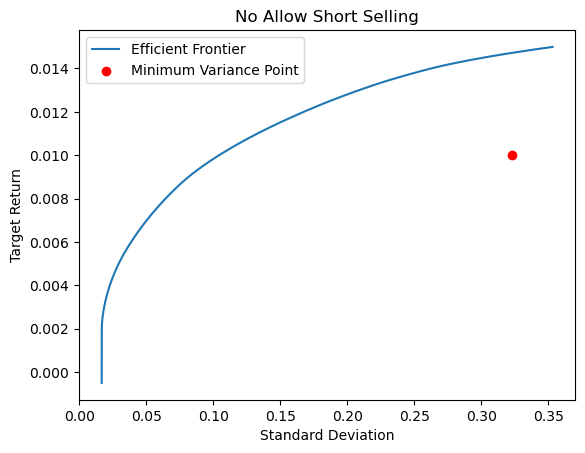

In [39]:
# Extract the standard deviation and mean return for the minimum variance point
std_min_variance = np.sqrt(np.round(np.matmul(np.matmul(w.T, S), w), 6))
mean_return_min_variance = 0.01

# Plot the efficient frontier
plt.ylabel('Target Return')
plt.xlabel('Standard Deviation')
plt.title('No Allow Short Selling')

# Plot the efficient frontier
plt.plot(x_plt, y_plt, label='Efficient Frontier')

# Plot the minimum variance point as a red point
plt.scatter(std_min_variance, mean_return_min_variance, color='red', label='Minimum Variance Point', zorder=5)

# Add title and legend
plt.legend()
plt.show()

Problem1_Q5

In [40]:
target_return = 0.02
G = matrix(np.concatenate((-np.transpose(mean_return), -np.identity(n)), 0))
h = matrix(np.concatenate((-np.ones((1, 1))*target_return, np.zeros((n, 1))), 0))
A = matrix(np.ones((1, n)))
b = matrix(1.0)
q = matrix(np.zeros((n, 1)))
sol = qp(cov, q, G, h, A, b)
w = np.asarray(sol['x']).squeeze()
print("Target Return : ", target_return)
print("Portfolio Return : ", np.sum(w*r))
print("Standard Deviation : ", np.sqrt(np.matmul(np.matmul(w.T, S), w)))
print("Weight")
print(pd.DataFrame(list(np.asarray(sol['x']).T),columns=which_column, index=['Weight']))

     pcost       dcost       gap    pres   dres
 0:  1.6524e-02 -9.8986e-01  1e+01  3e+00  4e+00
 1:  1.9735e-02 -8.1877e-01  1e+00  8e-02  9e-02
 2:  2.0120e-02 -5.0741e-01  7e-01  5e-02  5e-02
 3:  4.7612e-02  4.9275e-01  7e-01  5e-02  5e-02
 4:  1.5586e-01  7.7957e-01  5e-01  2e-02  2e-02
 5:  1.8010e-01  1.8979e+00  4e-01  2e-02  2e-02
 6:  1.8810e-01  1.2108e+01  3e-01  2e-02  2e-02
 7:  1.8931e-01  4.9917e+02  3e+00  2e-02  2e-02
 8:  1.9005e-01  8.4092e+04  2e+01  2e-02  2e-02
 9:  1.9009e-01  2.9339e+08  1e+03  2e-02  2e-02
10:  1.9009e-01  6.8003e+13  3e+06  2e-02  9e-02
11:  1.9009e-01  1.5608e+21  7e+11  2e-02  5e+06
12:  1.9009e-01  3.5543e+30  3e+19  2e-02  7e+15
13:  1.9009e-01  3.2168e+41  8e+29  2e-02  7e+26
14:  1.9009e-01  3.2422e+51  8e+39  2e-02  6e+36
15:  1.9009e-01  1.7489e+62  4e+50  2e-02  4e+47
16:  1.9009e-01  1.1546e+73  2e+61  2e-02  2e+58
17:  1.9009e-01  3.3959e+83  6e+71  2e-02  7e+68
18:  1.9009e-01  1.1469e+94  2e+82  2e-02  2e+79
19:  1.9009e-01  1.87

In [41]:
weights_sum = np.sum(w)

# check if weight sum equals 1
print(f"Sum of the portfolio weights: {weights_sum}")

if np.isclose(weights_sum, 1.0):
    print("The sum of the portfolio weights is 1.")
else:
    print("The sum of the portfolio weights is NOT 1.")

Sum of the portfolio weights: 1.0000000000000009
The sum of the portfolio weights is 1.


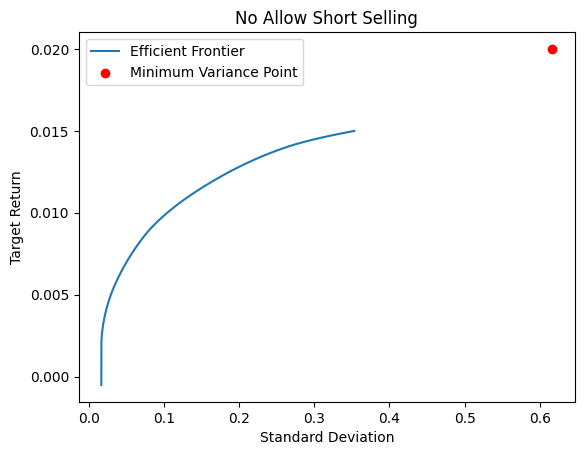

In [25]:
# Extract the standard deviation and mean return for the minimum variance point
std_min_variance = 0.6165903741905472
mean_return_min_variance = 0.02

# Plot the efficient frontier
plt.ylabel('Target Return')
plt.xlabel('Standard Deviation')
plt.title('No Allow Short Selling')

# Plot the efficient frontier
plt.plot(x_plt, y_plt, label='Efficient Frontier')

# Plot the minimum variance point as a red point
plt.scatter(std_min_variance, mean_return_min_variance, color='red', label='Minimum Variance Point', zorder=5)

# Add title and legend
plt.legend()
plt.show()